In [1]:
import matplotlib.pyplot as plt
import pandas as pd

from math import *
from tooling import *

# Placement Counts by Coordinate

How many times did redditors place a pixel at each coordinate? We calculate `counts`, a list with an element for each of the 4,000,000 coordinates that stores the placement count. We ignore moderator rectangle placements.

In [2]:
class CoordinatePlacementCounter(Analysis):

    def __init__(self):
        self._result = [0] * (CANVAS_WIDTH * CANVAS_HEIGHT)

    def on_pixel(self, timestamp, redditor, x, y, color):
        self._result[y * CANVAS_WIDTH + x] += 1

In [3]:
analysis = CoordinatePlacementCounter()
analysis = Logger(analysis)

counts = perform_analysis(analysis, TIMESTAMP_SORTED_GZIP)

As we will see, the placement counts have extreme outliers that negatively affect much of what we want to do. We calculate `log_counts`, the log of the counts, for future use in our visualizations.

In [5]:
log_counts = [0 if x == 0 else 1 + log(x) for x in counts]

## Histogram

The vast majority of coordinates have 12 or fewer pixel placements.

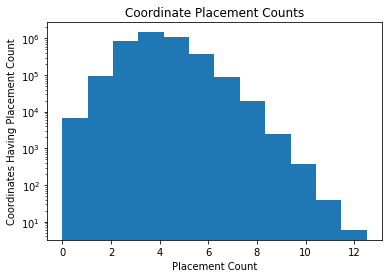

In [15]:
plt.hist(log_counts, log=True, bins=12)
plt.title('Coordinate Placement Counts')
plt.xlabel('Placement Count')
plt.ylabel('Coordinates Having Placement Count')
plt.show()

## Outliers

However there are many outliers, coordinates that have far more than 12 placements.

In [10]:
outliers = []

for index, count in enumerate(counts):
    if count > 12:
        x = index % CANVAS_WIDTH
        y = index // CANVAS_WIDTH

        outliers.append((x, y, count))

outliers = pd.DataFrame(outliers, columns=['x', 'y', 'Placements'])

In [9]:
print('All placement counts: ' + str(len(counts)))
print('Placement counts above 12: ' + str(len(outliers.index)))

All placement counts: 4000000
Placement counts above 12: 2509791


We show the most extreme outliers. What could their stories be?

In [12]:
extreme_outliers = outliers.sort_values(by=['Placements'], ascending=False).head(15).reset_index()
extreme_outliers

index     x     y  Placements
0         0     0     0       98807
1    883374   359   564       69198
2    883364   349   564       55230
3   1180458   859   766       52261
4   1180459   860   766       51485
5   1182828   104   768       38086
6   1182829   105   768       34082
7   2509790  1999  1999       31437
8      1985  1999     0       30882
9   1126709   633   728       30752
10  1166699  1058   756       29295
11  1531699  1999   999       26928
12  1530801   999   999       23271
13  2507815     0  1999       22763
14   651174   420   420       22365

## Heat Map

We conclude with a heat map showing how popular each coordinate was to place pixels on. The lighter the pixel, the more placements occurred on it.

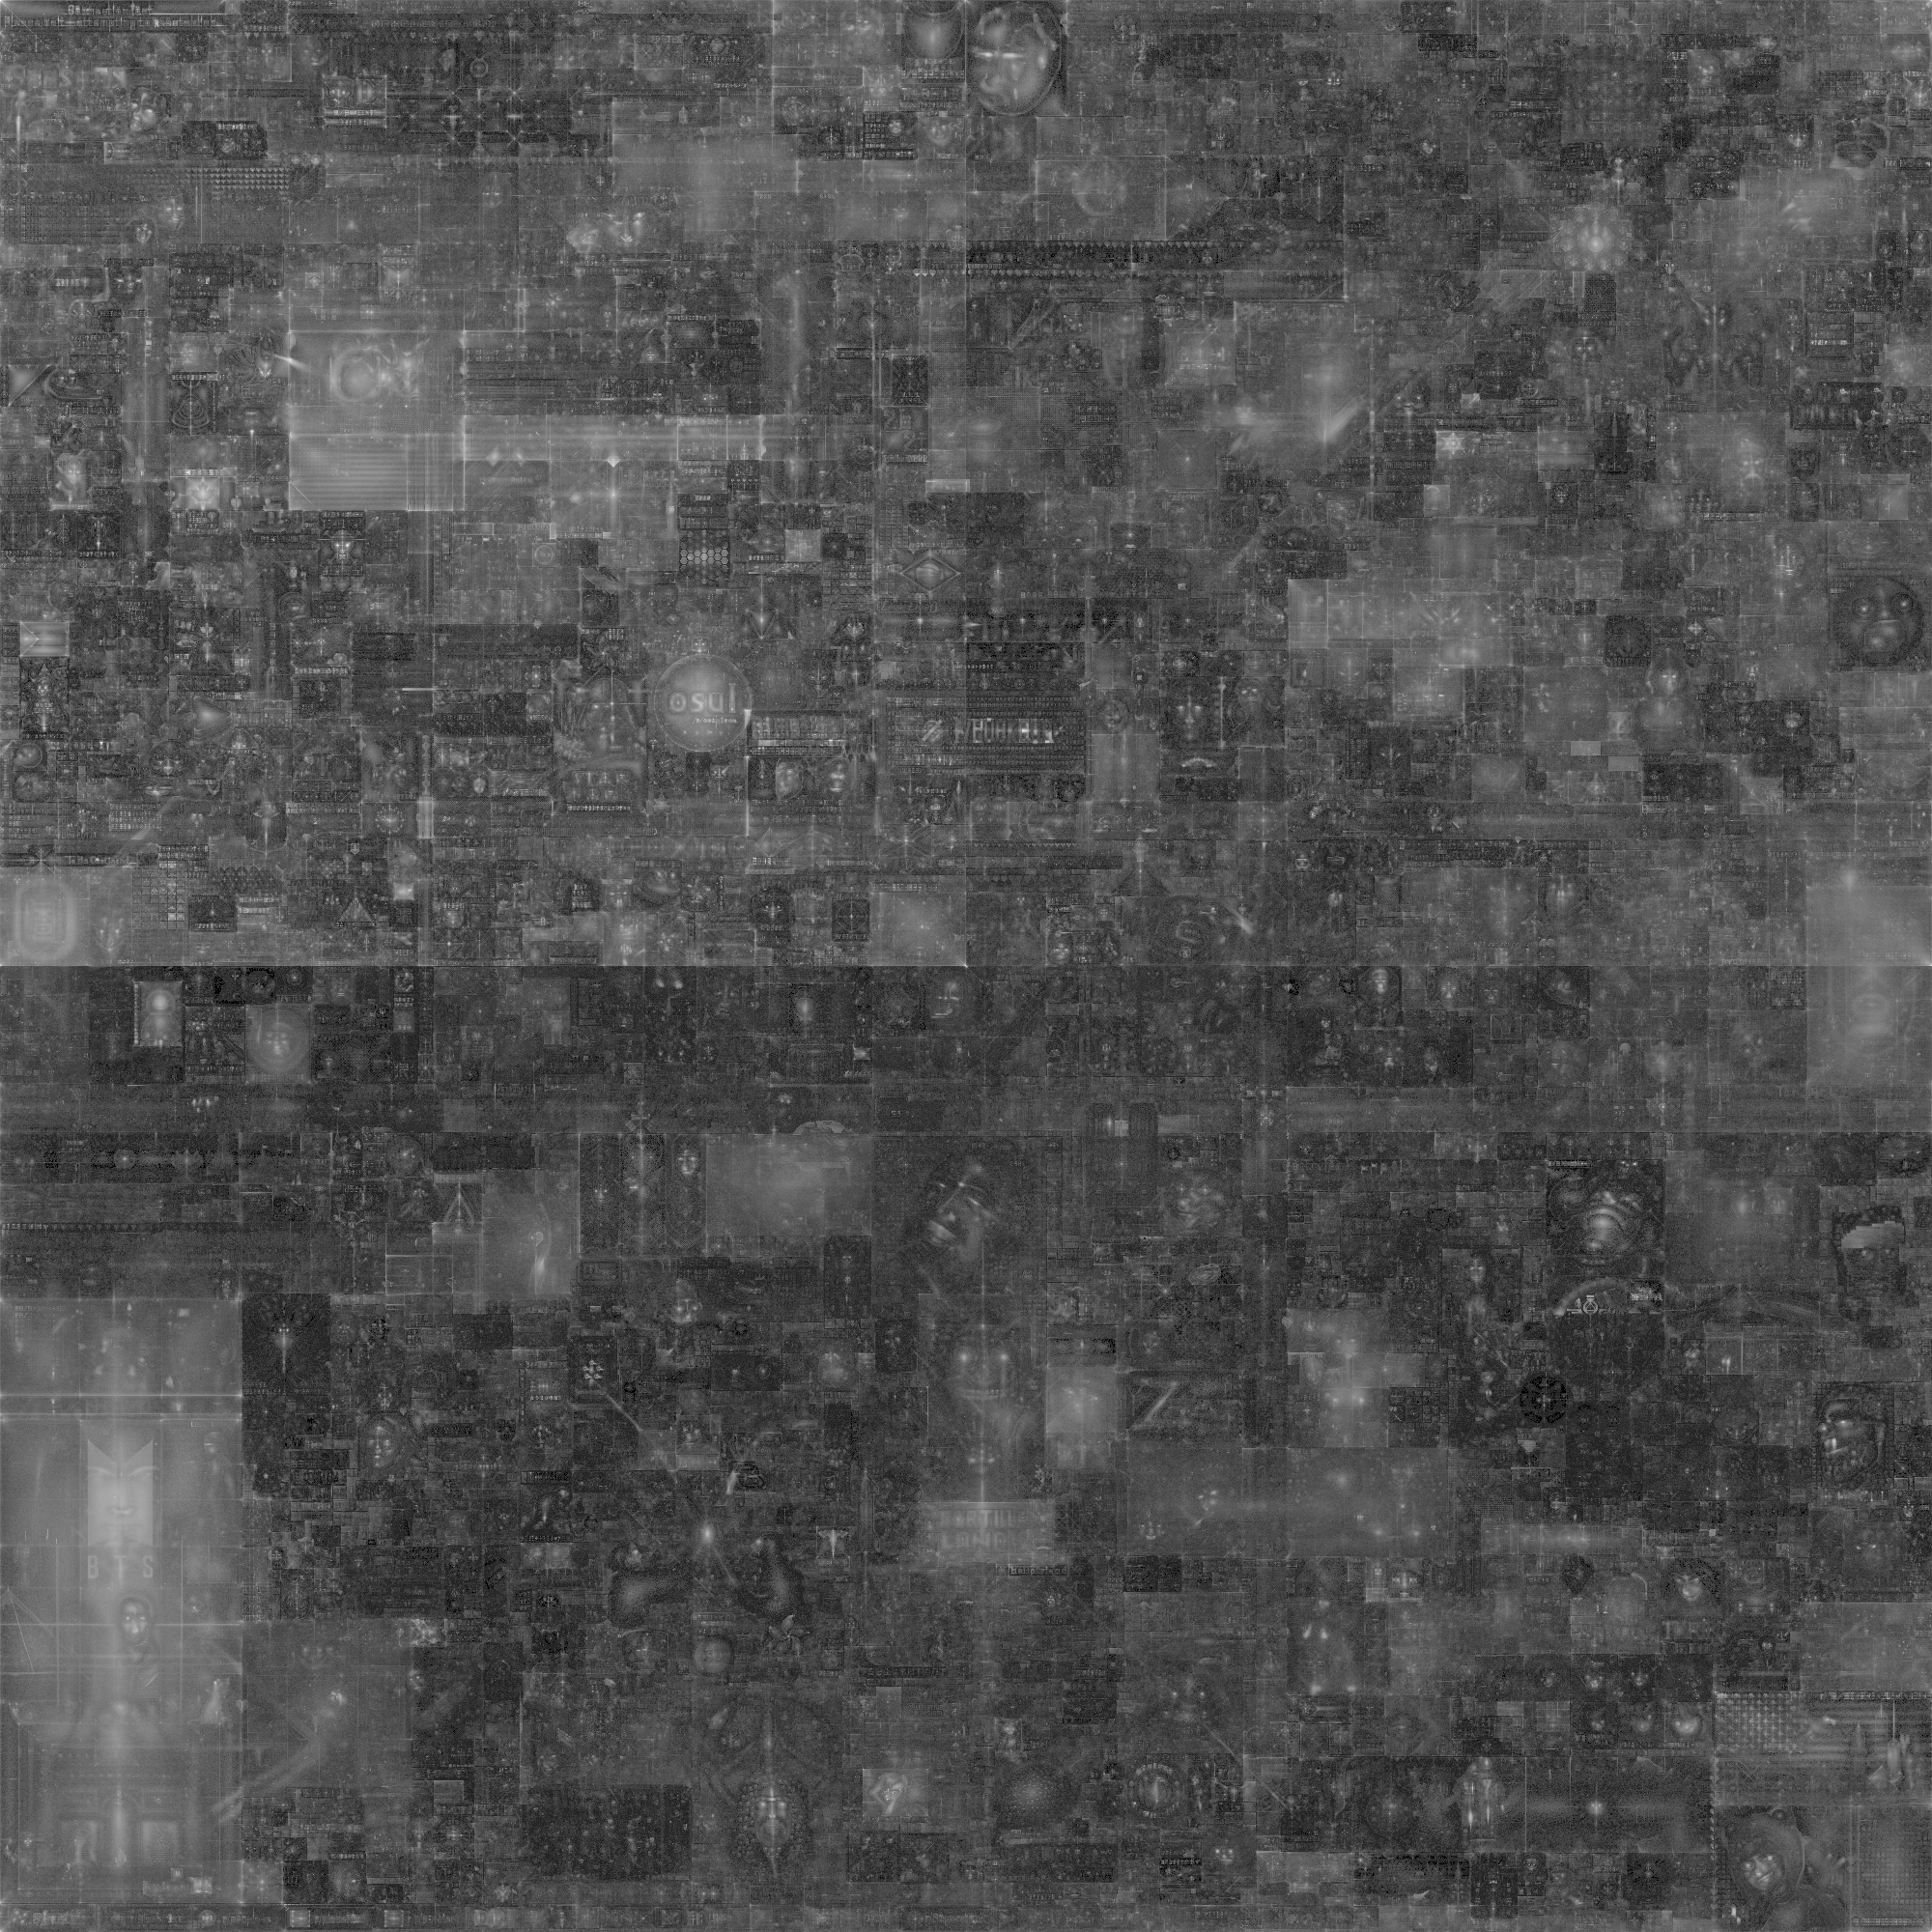

In [ ]:
generate_intensity_image(log_counts)